In [2]:
import matplotlib.pyplot as plt

In [3]:
# decision tree 
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Nome do dataset no Hugging Face Hub (exemplo comum)
dataset = load_dataset("Ashen2020/Heart_disease_dataset")

train_data = dataset["train"]

# Converte para DataFrame pandas
df = train_data.to_pandas()

# Verifica as colunas disponíveis
print(df.columns)

# Suponha que a coluna alvo seja "target"
X = df.drop(columns=["target"])
y = df["target"]

# # Divide em treino e teste (80% treino, 20% teste)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Verifica formatos
# print(X_train.shape, y_train.shape)

c:\Users\Andre\miniconda3\envs\huggingface_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


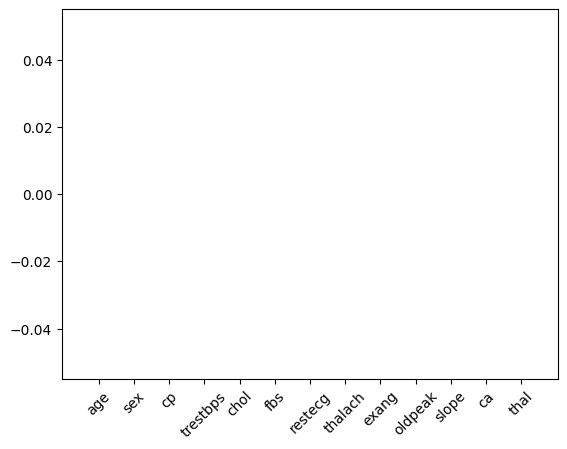

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

model = MLPClassifier(hidden_layer_sizes=(10), random_state=1)
model.fit(X, y)

# Compute the permutation importance
result = permutation_importance(
    model, 
    X, 
    y,
    n_repeats=10, 
    random_state=1,
    scoring='accuracy'
    )

# Plot feature importances
plt.bar(X.columns, result.importances_mean)
plt.xticks(rotation=45)
plt.show()

In [6]:
result


{'importances_mean': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'importances_std': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'importances': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])}